## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

### Note: Gridsearch for SVM, Random Forest and XGBoost was not performed because my PC is crashing each and every time when the above was attempted.

### Gridsearch for Logistics Regression was done successfully

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from imblearn import over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Checking for null
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#observe the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print("Non-fraudulent class %: "+ str(normal_share))
fraud_share=classes[1]/df['Class'].count()*100
print("Fraudulent class %: "+ str(fraud_share))

Non-fraudulent class %: 99.82725143693798
Fraudulent class %: 0.1727485630620034


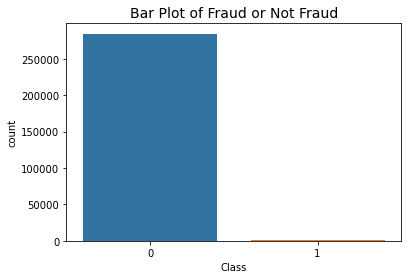

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.title('Bar Plot of Fraud or Not Fraud',fontsize=14)
sns.countplot(x="Class", data=df)

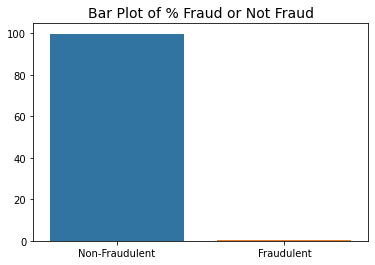

In [9]:
plt.title('Bar Plot of % Fraud or Not Fraud',fontsize=14)
#sns.barplot(x="Class", y="%", data=)
sns.barplot(x=['Non-Fraudulent', 'Fraudulent'], y=[normal_share,fraud_share])

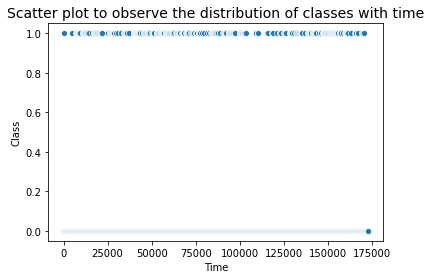

In [10]:
# Create a scatter plot to observe the distribution of classes with time
plt.title('Scatter plot to observe the distribution of classes with time',fontsize=14)
sns.scatterplot(x=df['Time'], y=df['Class'])

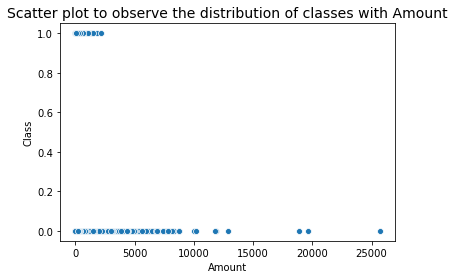

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.title('Scatter plot to observe the distribution of classes with Amount',fontsize=14)
sns.scatterplot(x=df['Amount'], y=df['Class'])

In [12]:
# Drop unnecessary columns
df = df.drop("Time", axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

#### Standardising amount column 

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

### Splitting the data into train & test data

In [14]:
#y= #class variable
X = df.drop('Class',axis=1)
y = df['Class']

#### Implementing stratified sampling

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=1)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

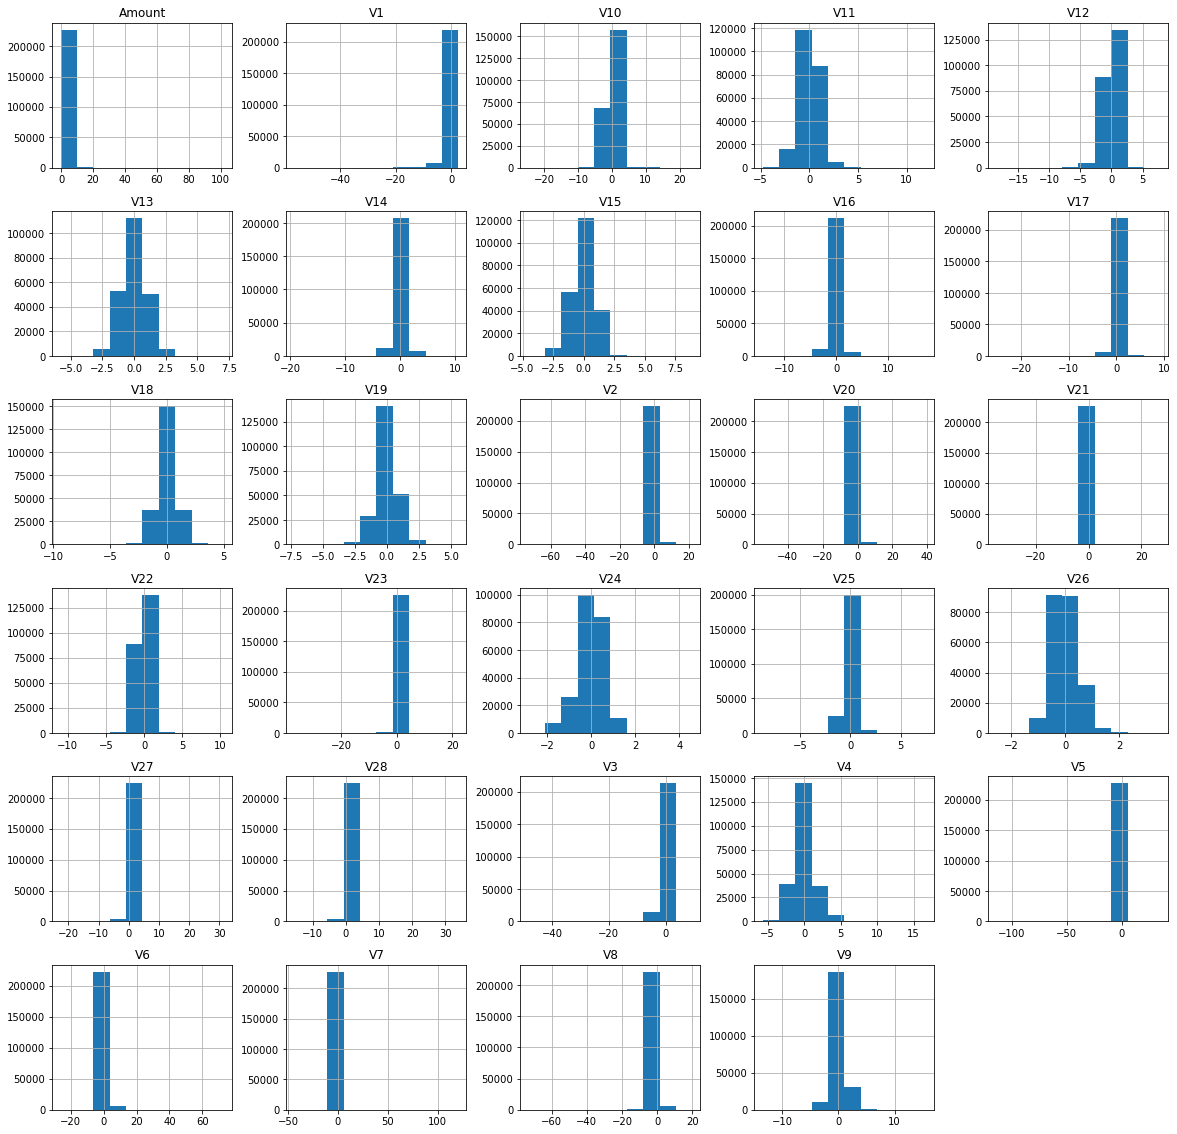

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize = (20,20))
plt.show()
#Histogram of each classifier 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)
pt.transform(X_test)

array([[ 0.58597474, -0.19236171,  0.86369249, ...,  0.03224239,
         0.11133589, -0.18349428],
       [ 1.29811302, -0.10601943, -1.27142752, ..., -0.05603251,
        -0.08315256,  0.70807026],
       [-0.66452167,  0.10788392,  0.67286125, ...,  0.77602923,
         0.51732837,  0.34425256],
       ...,
       [-1.61728593,  2.35026477, -0.61118981, ..., -4.81772747,
        -0.63443698, -1.00652669],
       [-0.66872379,  0.4585479 ,  1.42906341, ...,  0.73715225,
         0.38960743,  0.009759  ],
       [-0.40218628,  0.31721424,  0.97710755, ...,  0.45275387,
         0.57235235, -0.99732924]])

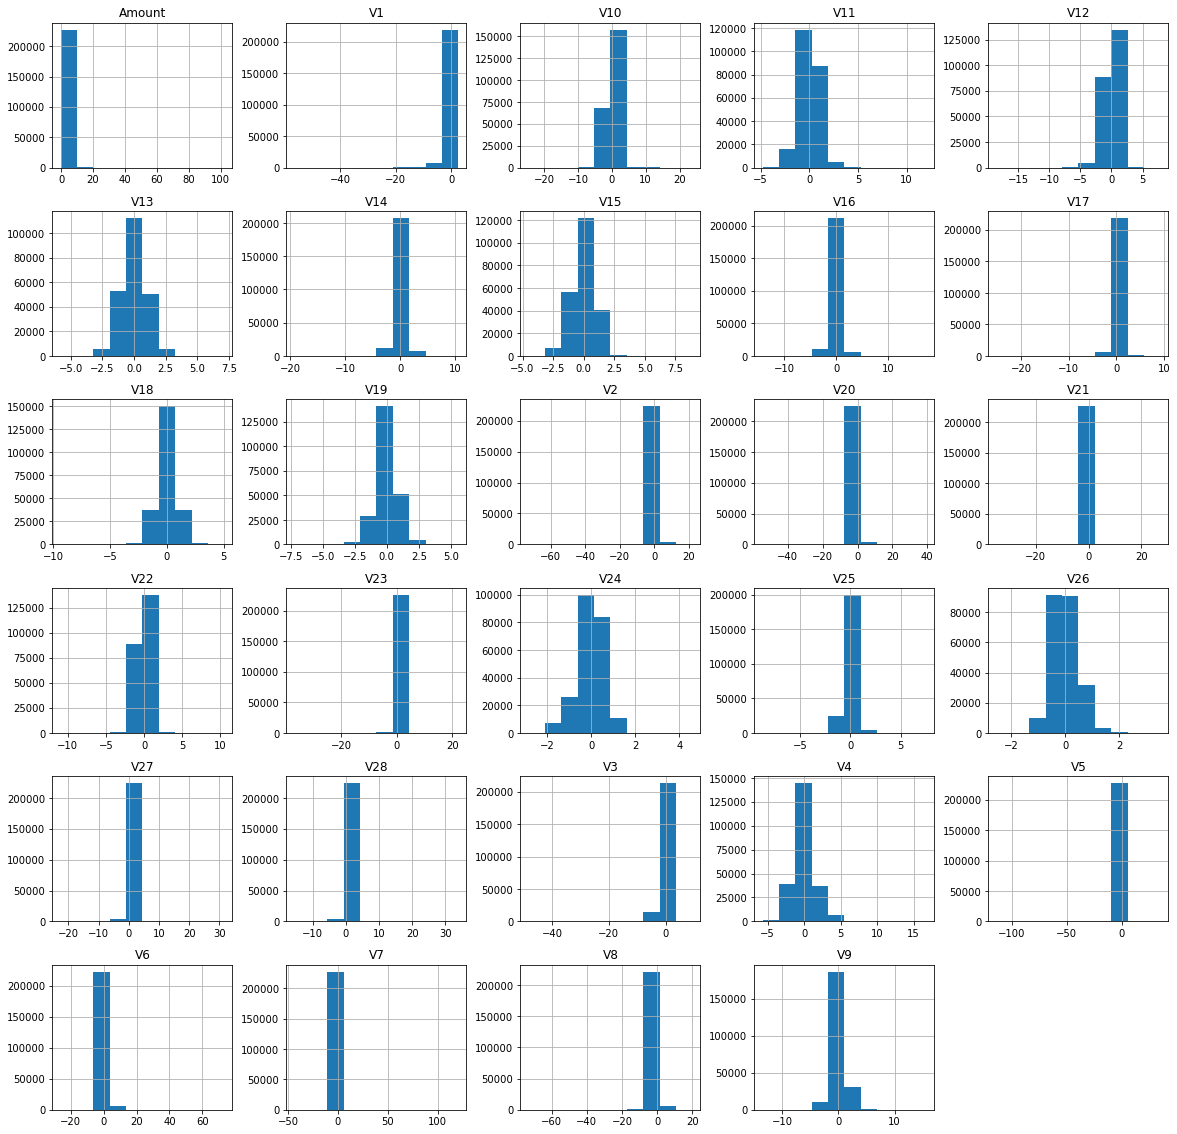

In [19]:
# plot the histogram of a variable from the dataset again to see the result 
X_train.hist(figsize = (20,20))
plt.show()
#Histogram of each classifier 

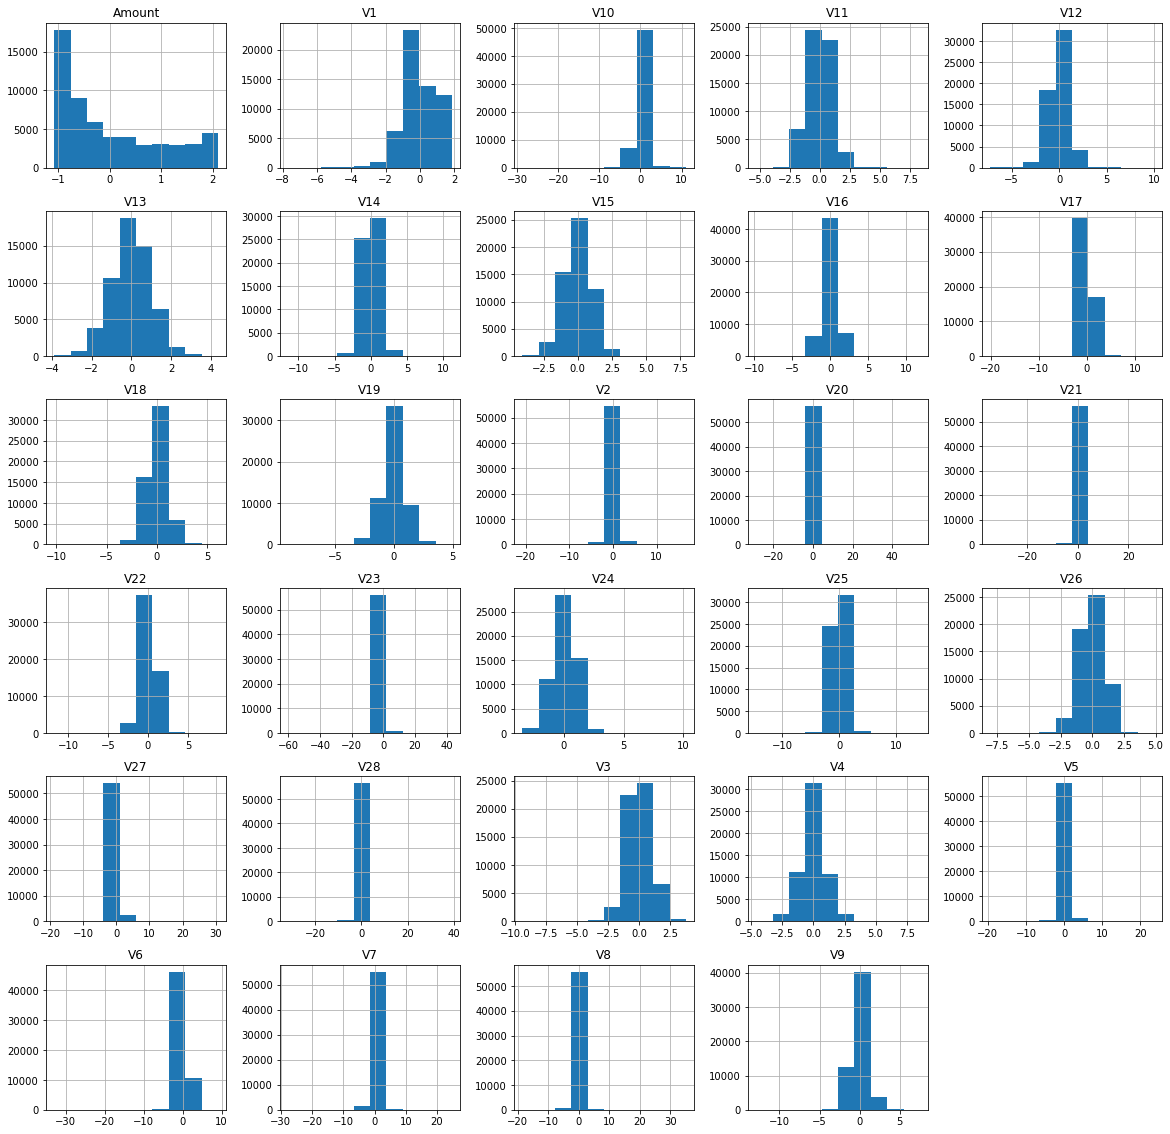

In [20]:
# plot the histogram of a variable from the dataset again to see the result 
X_test.hist(figsize = (20,20))
plt.show()
#Histogram of each classifier 

## Model Building
- Build different models on the imbalanced dataset and see the result

### Model 1: Logistic Regression

In [73]:
#performing cross validation
#performing hyperparameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model1 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


# summarize results
#printing the optimum value of hyperparameters

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979742 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.972082 (0.017490) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972097 (0.017468) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.972093 (0.017484) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.972118 (0.017463) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972123 (0.017456) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.972204 (0.017433) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.972431 (0.017259) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972432 (0.017262) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.973306 (0.016993) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.974584 (0.015993) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.974584 (0.015993) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.976867 (0.015452) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.979527 (0.012740) wi

In [80]:
#train the model
model1=None
model1 = LogisticRegression(random_state=1, C= 0.01, penalty='l2', solver='liblinear')
#model1 = LogisticRegression(random_state=1)
logit = model1.fit(X_train, y_train)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [81]:
#predictions
y_pred_logit = model1.predict(X_test) 

In [82]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

Accuracy Logit: 0.9991046662687406
Precision Logit: 0.8983050847457628
Recall Logit: 0.5408163265306123
F1 Score Logit: 0.6751592356687899


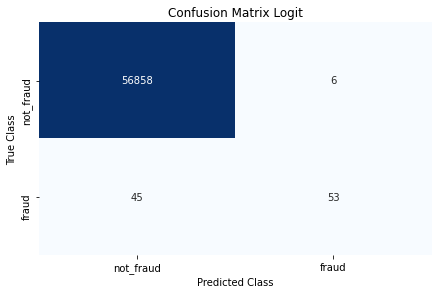

In [83]:
#printing Confusion Matrix
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [84]:
#AUC
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9850931474165355


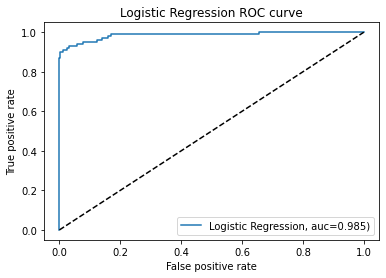

In [85]:
#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

### Model 2: SVM

### Note : Not Applying Gridsearch on SVM since it is way to computationally expensive for my PC/Google Colab Research

#### Applied following hyperparameters combinations -

#### 1.class_weight='balanced', C=10 || AUC = 0.9639654011576493

#### 2.Default parameters                    || AUC = 0.930923352388226

#### 3.class_weight='balanced', C=100 || AUC = 0.9315167840490164

#### 4.class_weight='balanced', C=.1  || AUC = 0.8770177932596785

In [98]:
#train the model
from sklearn.svm import SVC
#train the model with the best AUC
model2 = SVC(probability=True, random_state=1, C=10, class_weight='balanced')
svm = model2.fit(X_train, y_train)

In [99]:
#predictions
y_pred_svm = model2.predict(X_test)

In [100]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9945402197956532
Precision SVM: 0.11827956989247312
Recall SVM: 0.336734693877551
F1 Score SVM: 0.17506631299734748


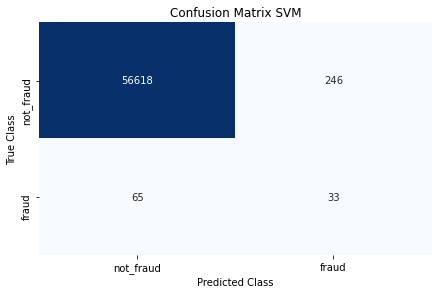

In [101]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [102]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9627787172831992


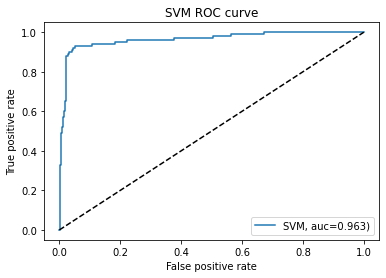

In [103]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()


### Model 3: Ensemble learning : Bagging (Random Forest)

In [ ]:
'''from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model3 = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
grid_search = GridSearchCV(estimator=model3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

In [86]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#train the model
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)

In [87]:
#predictions
y_pred_rf = model3.predict(X_test)

In [88]:
#scores
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9996137776061234
Precision RF: 0.9222222222222223
Recall RF: 0.8469387755102041
F1 Score RF: 0.8829787234042554


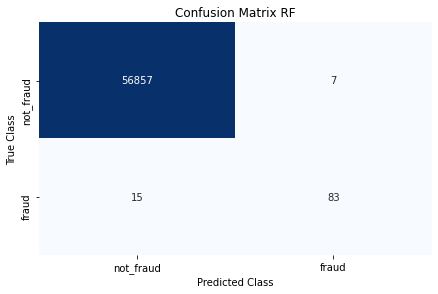

In [89]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [90]:
#AUC
y_pred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9685740520884775


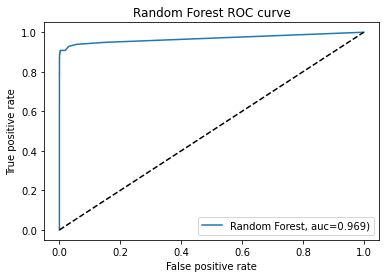

In [91]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

### Model 4: Ensemble learning : Boosting (XGBoost)

In [92]:
#train the model
model4 = XGBClassifier(random_state=2)
xgb = model4.fit(X_train, y_train)

[00:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
#predictions
y_pred_xgb = model4.predict(X_test)

In [94]:
#scores
print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(y_test, y_pred_xgb))

Accuracy XGB: 0.9995611109160493
Precision XGB: 0.9294117647058824
Recall XGB: 0.8061224489795918
F1 Score XGB: 0.8633879781420767


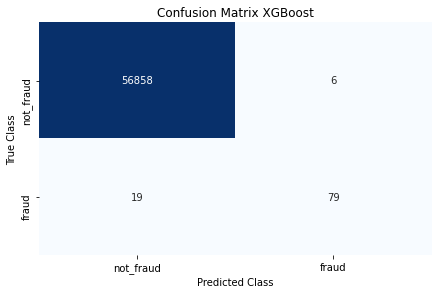

In [95]:
#CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [96]:
#AUC
y_pred_xgb_proba = model4.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.9819150490106003


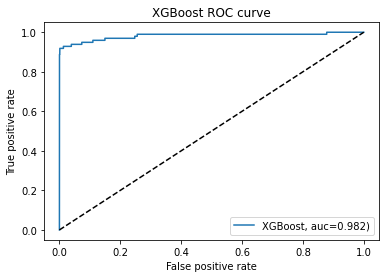

In [97]:
#ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Print the class distribution after applying SMOTE 

In [21]:
import warnings
warnings.filterwarnings("ignore")

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

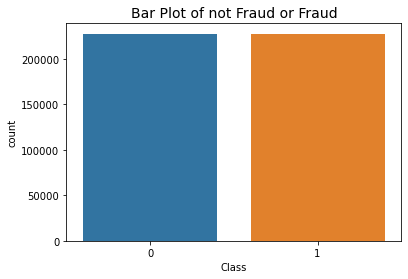

In [22]:
y_train_df_smote = y_train_smote.to_frame()
y_train_df_smote = y_train_df_smote.rename(columns = {0:'Class'})
plt.title('Bar Plot of not Fraud or Fraud',fontsize=14)
sns.countplot(x="Class", data=y_train_df_smote)

### Model 5: Logistics Regression on balanced dataset (SMOTE)

In [111]:
#performing cross validation
#performing hyperparameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model5 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model5, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_smote, y_train_smote)


# summarize results
#printing the optimum value of hyperparameters

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988685 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988685 (0.000381) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988685 (0.000381) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988684 (0.000382) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.988684 (0.000381) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988684 (0.000381) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988683 (0.000382) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.988679 (0.000381) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988679 (0.000382) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988676 (0.000382) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.988626 (0.000384) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988625 (0.000384) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988616 (0.000384) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.988395 (0.000393) wit

In [112]:
#train the model
model5=None
model5 = LogisticRegression(random_state=1, C= 100, penalty='l2', solver='lbfgs')
#model1 = LogisticRegression(random_state=1)
logit = model5.fit(X_train_smote, y_train_smote)

In [113]:
#predictions
y_pred_logit = model5.predict(X_test) 

Accuracy Logit: 0.9074295144131175
Precision Logit: 0.01662619092097889
Recall Logit: 0.9081632653061225
F1 Score Logit: 0.03265455879655109


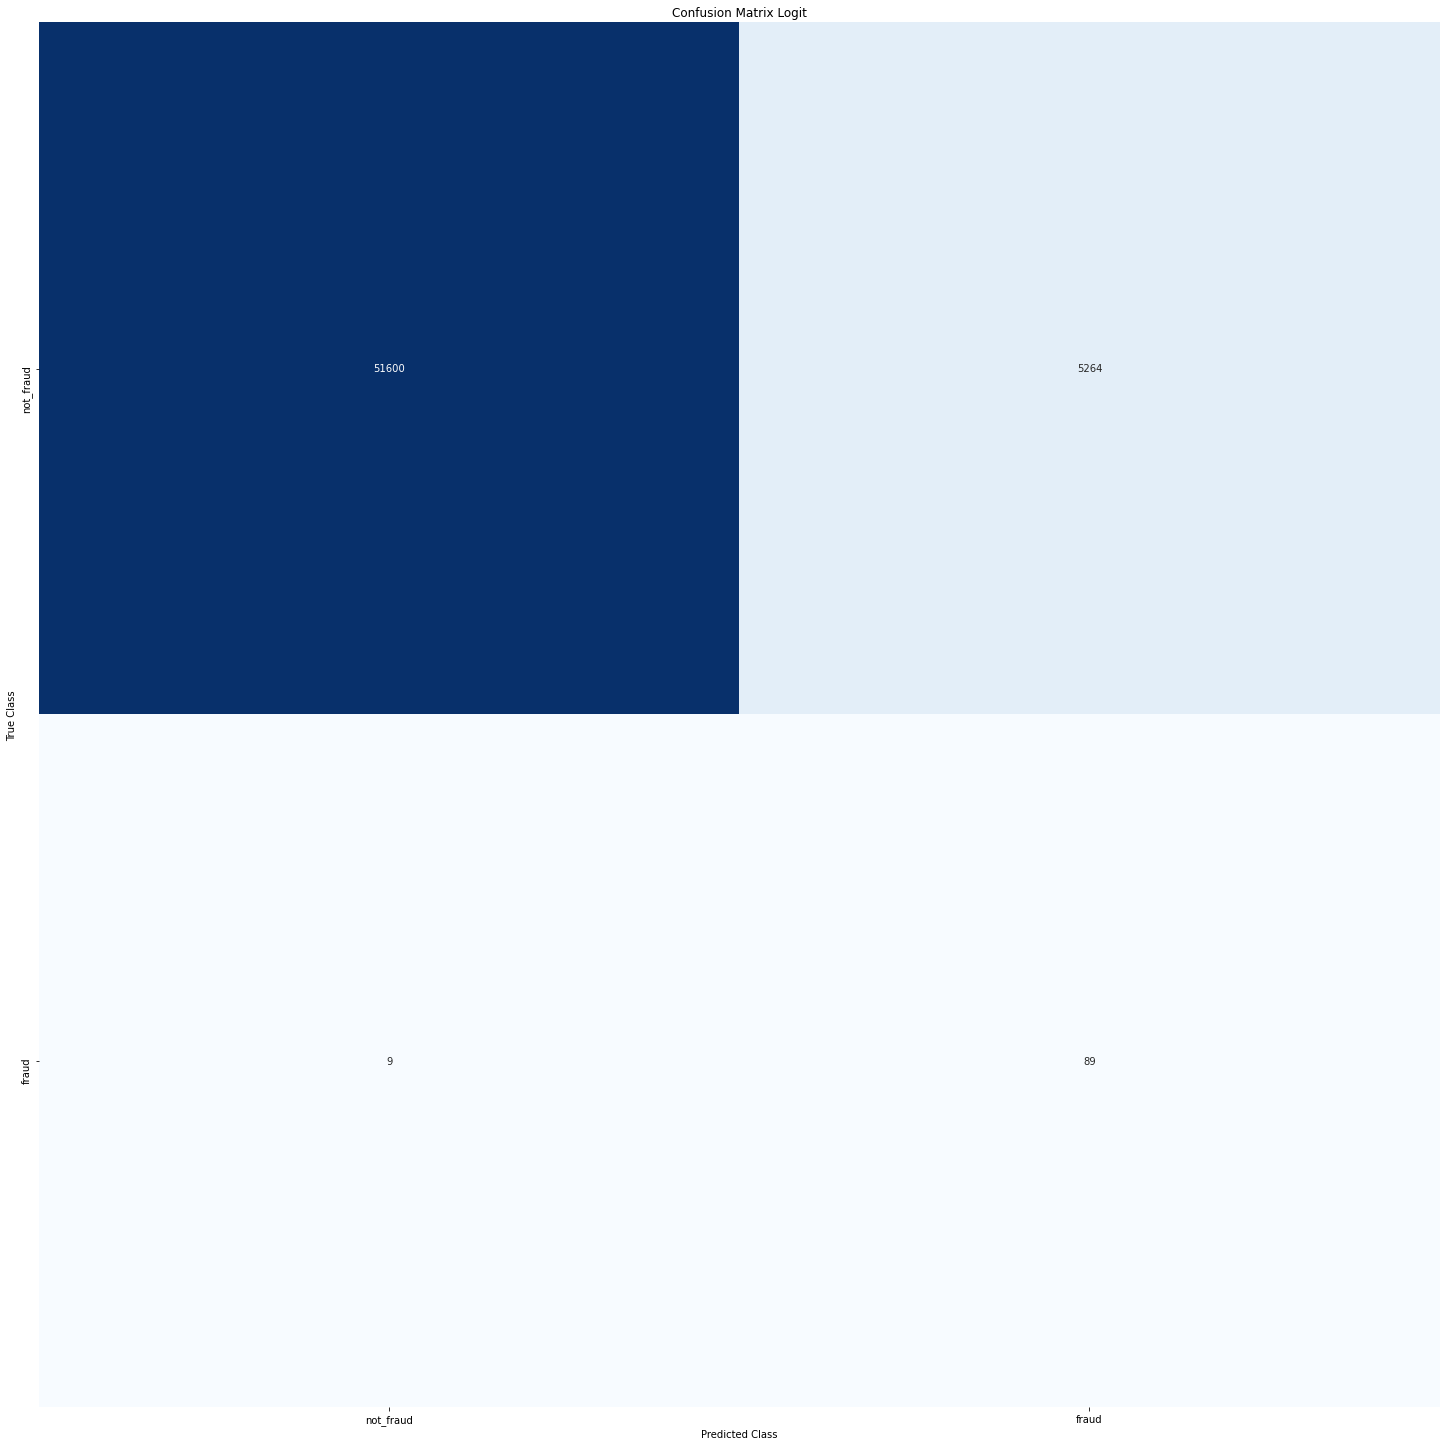

In [114]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

#printing Confusion Matrix
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC Logistic Regression : 0.9560260320363373


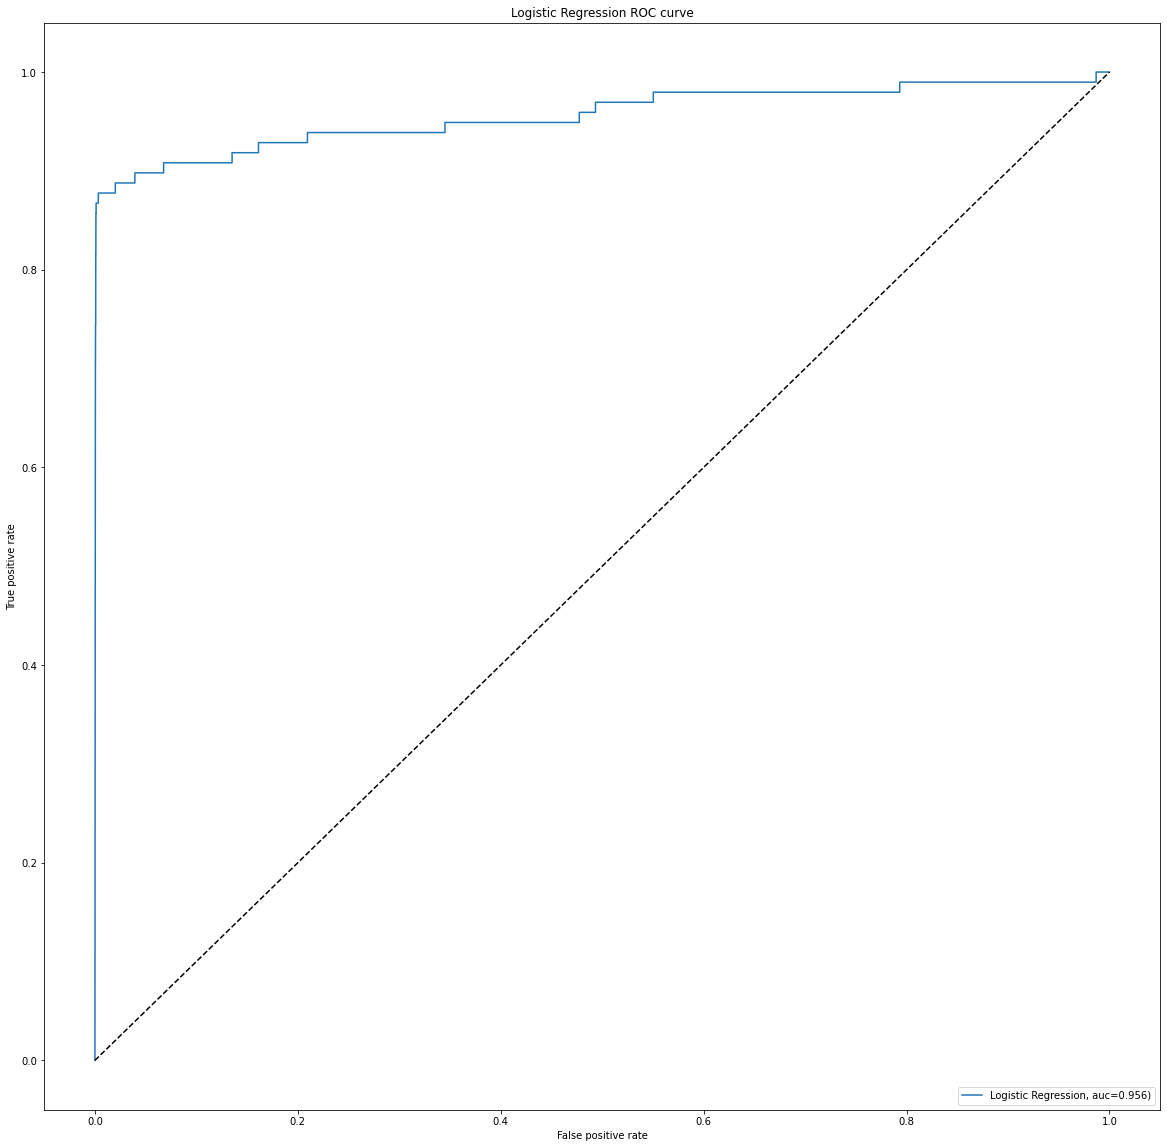

In [115]:
#AUC
y_pred_logit_proba = model5.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

### Model 6: SVM on SMOTE dataset

In [150]:
#train the model
from sklearn.svm import SVC
#train the model with the best AUC
model6 = SVC(random_state=1, class_weight='balanced', probability=True)
svm = model6.fit(X_train_smote, y_train_smote)
#predictions
y_pred_svm = model6.predict(X_test)

Accuracy SVM: 0.9661002071556476
Precision SVM: 0.03168114460909555
Recall SVM: 0.6326530612244898
F1 Score SVM: 0.06034063260340632


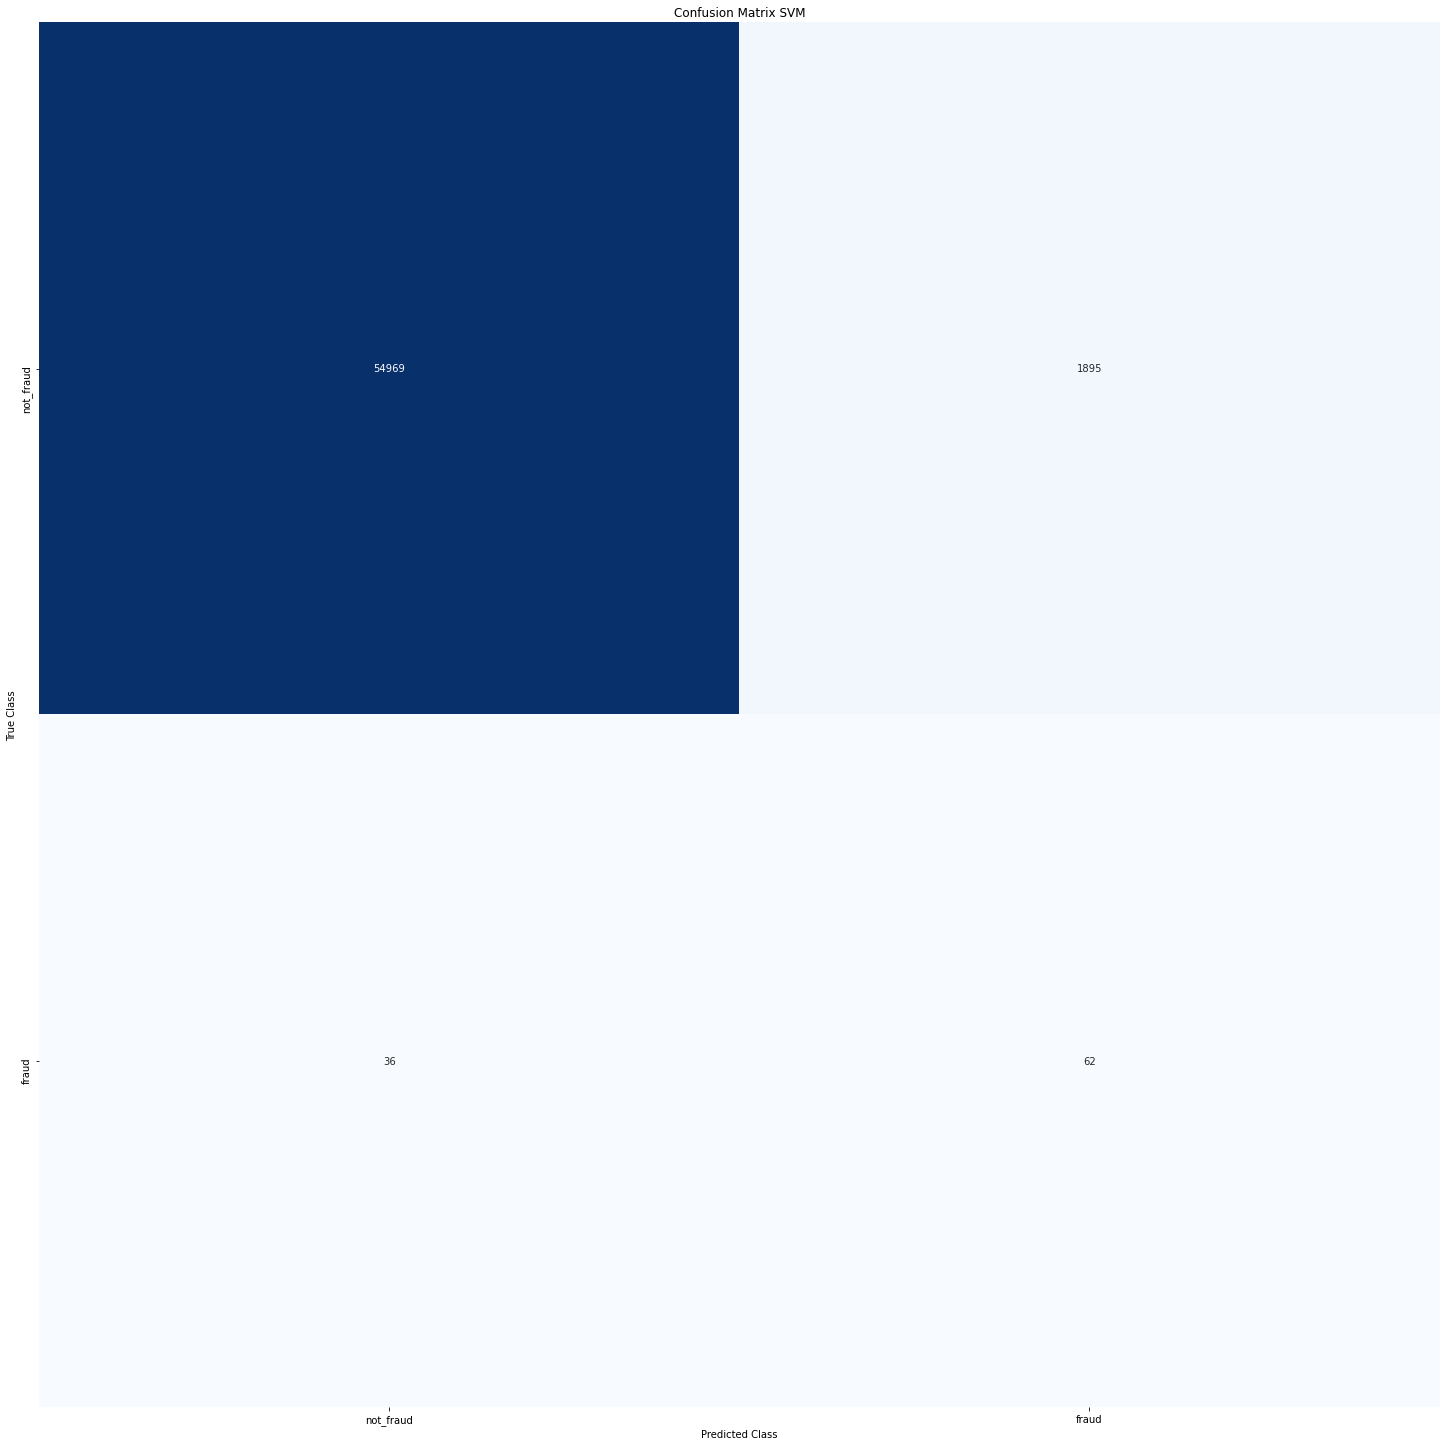

In [151]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC SVM : 0.7497943535883684


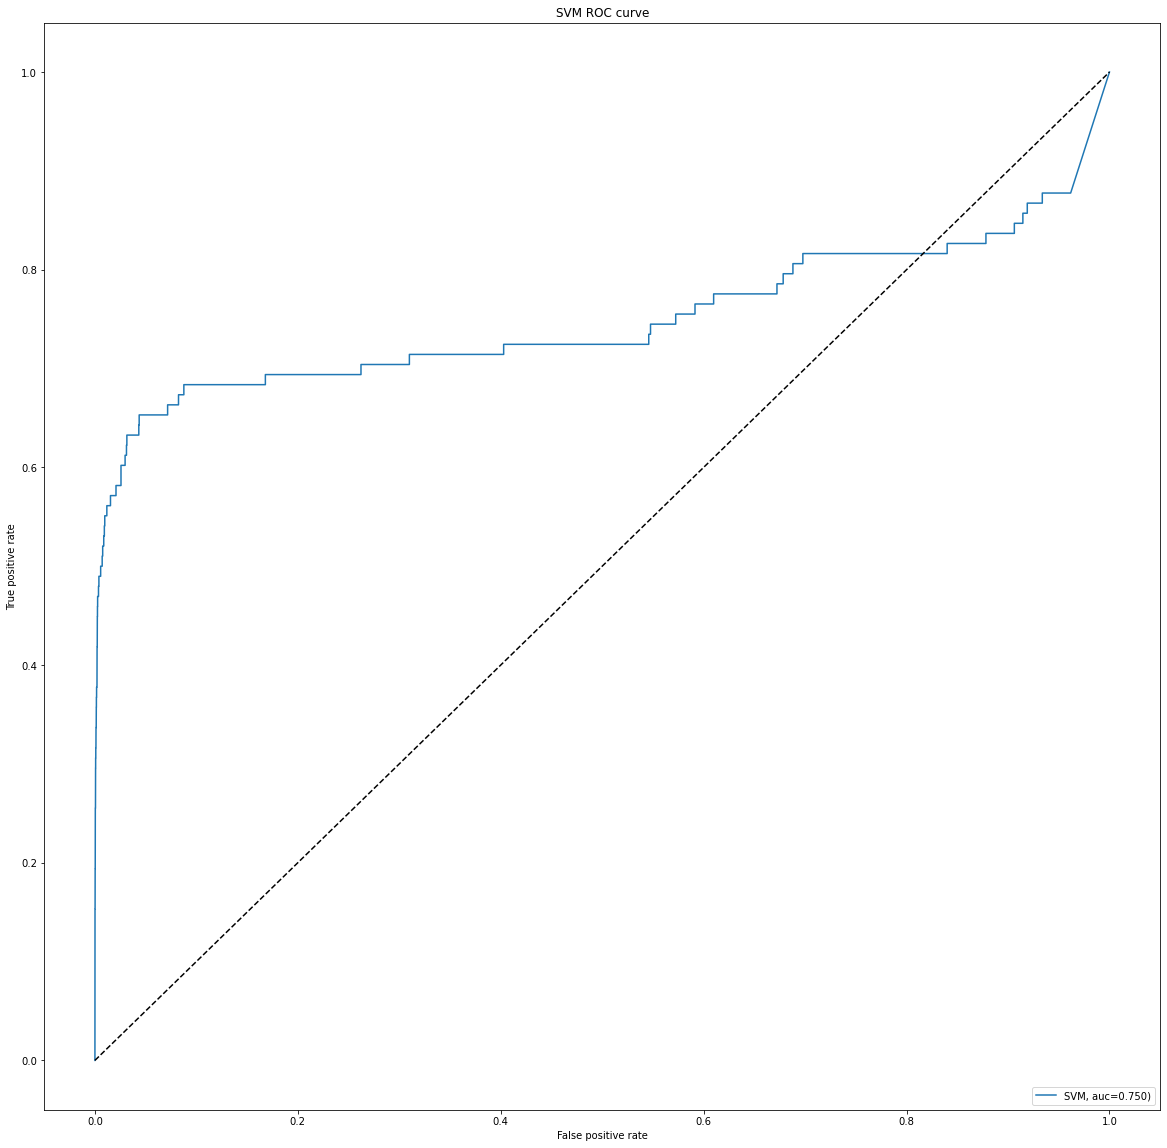

In [152]:
#AUC
y_pred_svm_proba = model6.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

### Model 7: Ensemble learning : Bagging (Random Forest) on SMOTE data

In [119]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#train the model
model7 = RandomForestClassifier(random_state=2)
rf = model7.fit(X_train_smote, y_train_smote)
#predictions
y_pred_rf = model7.predict(X_test)

In [120]:
#scores
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9995259997893332
Precision RF: 0.898876404494382
Recall RF: 0.8163265306122449
F1 Score RF: 0.8556149732620321


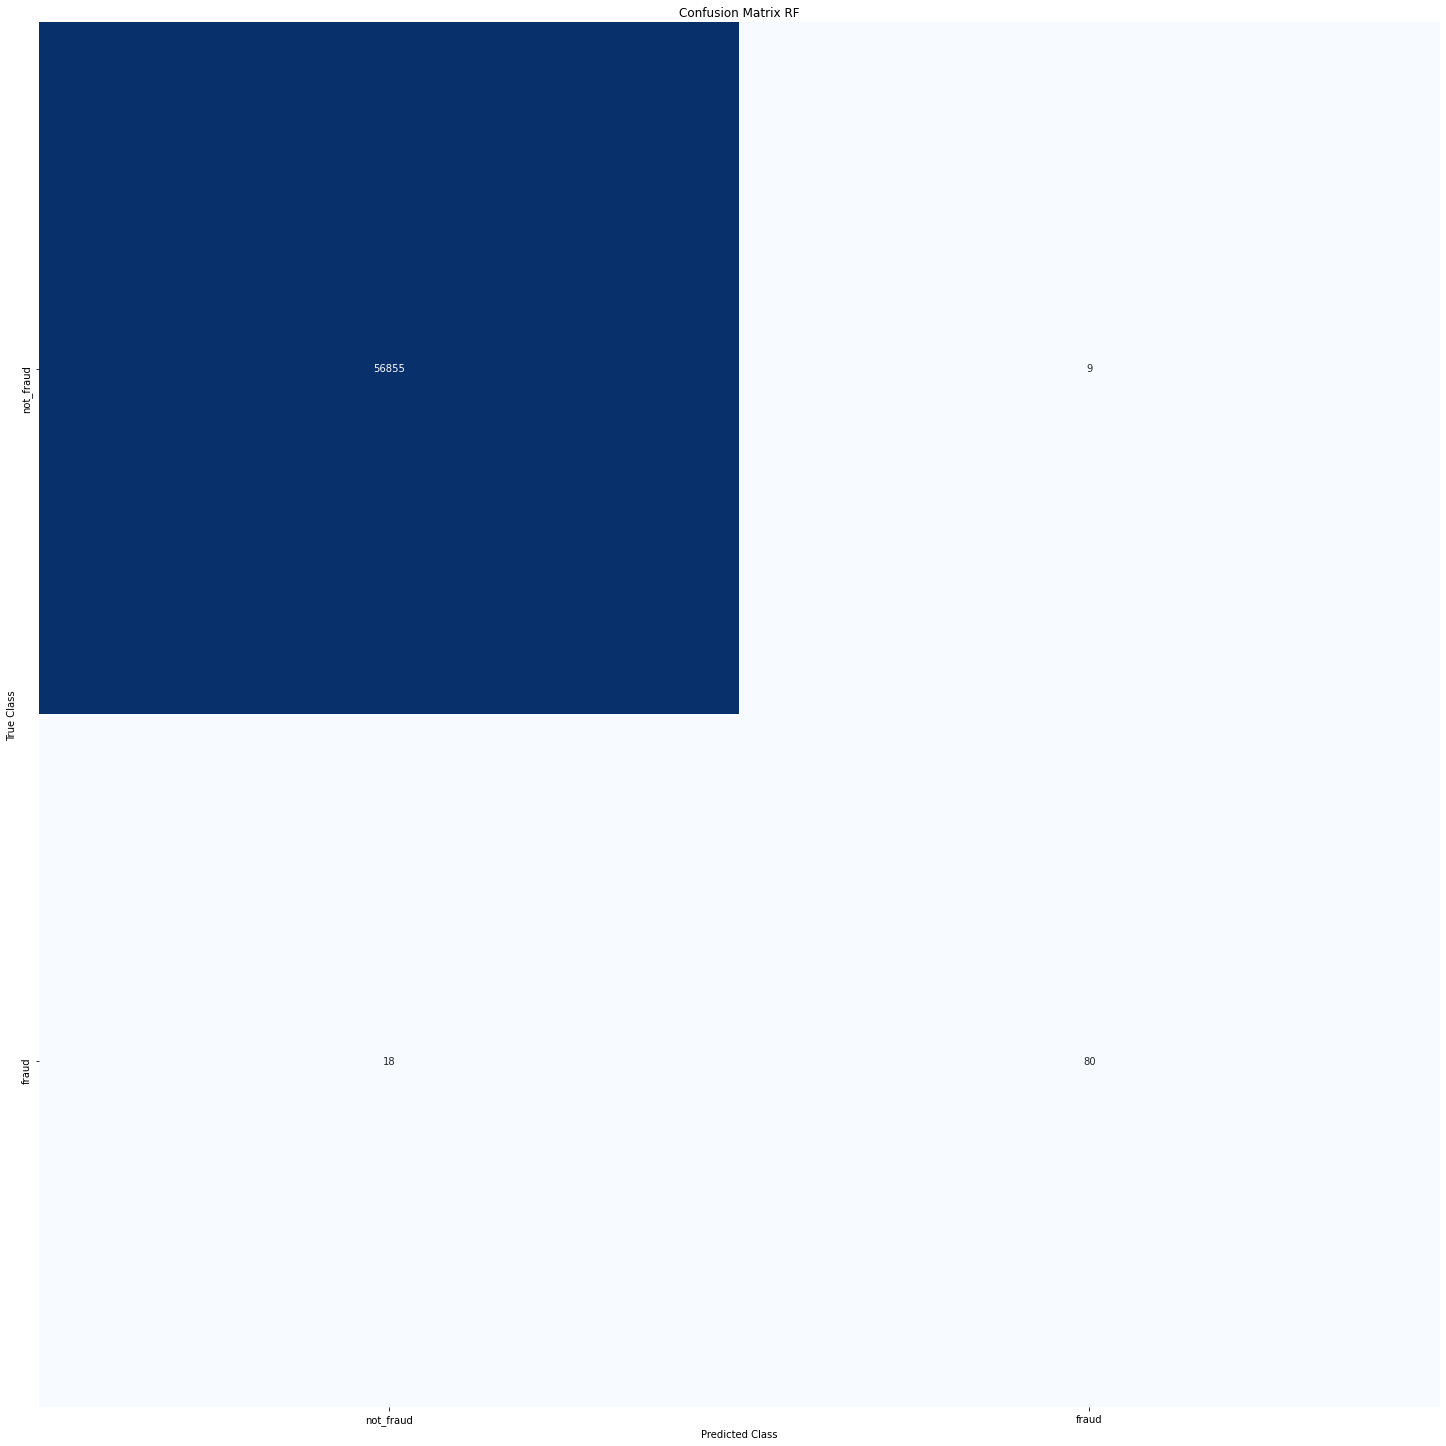

In [121]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC Random Forest : 0.9830235836596879


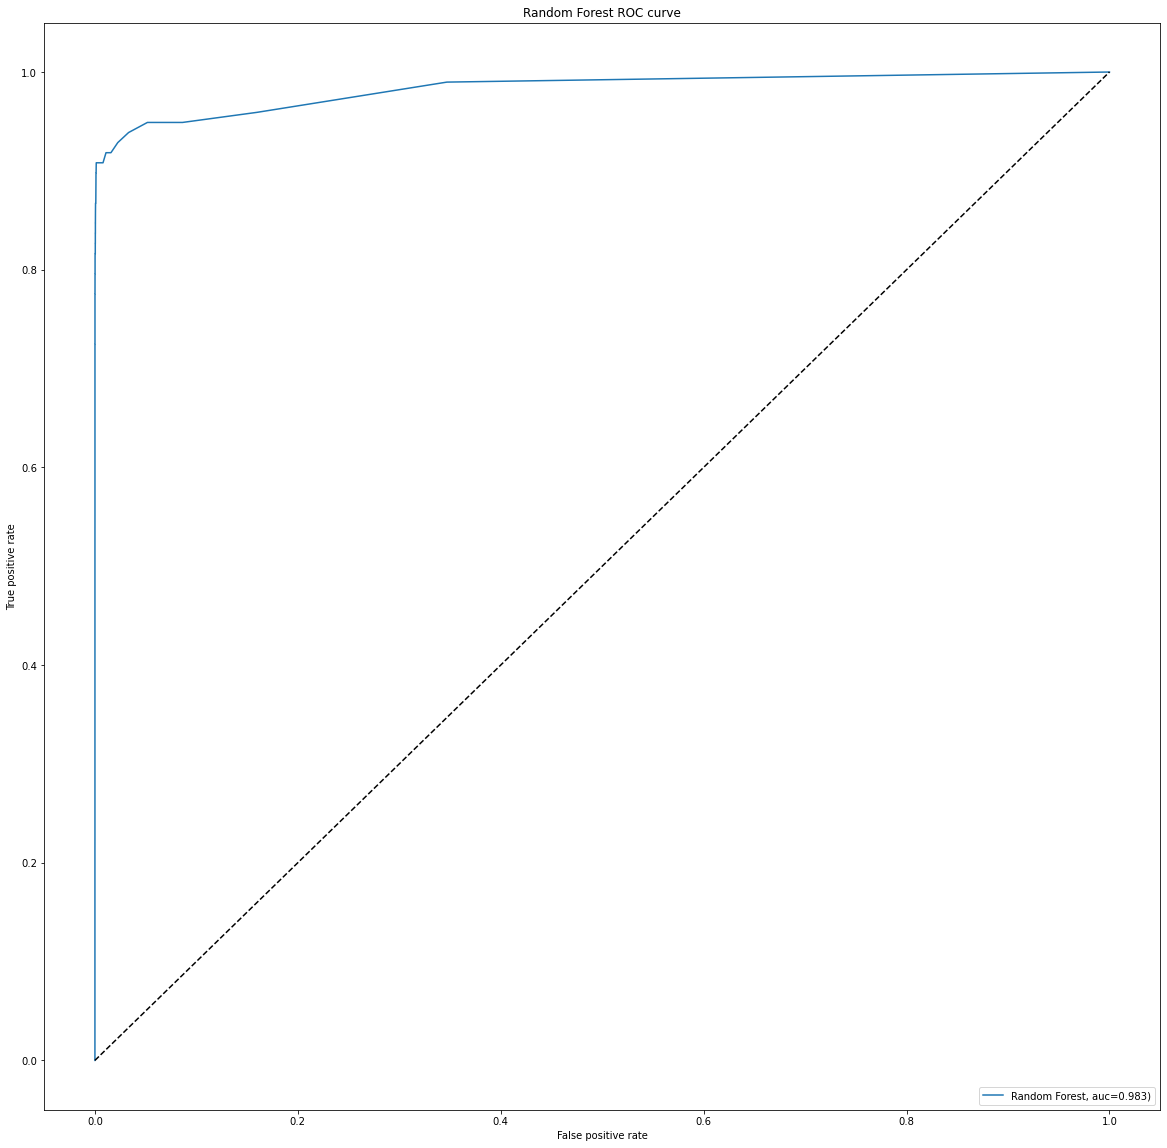

In [122]:
#AUC
y_pred_rf_proba = model7.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

### Model 8: Ensemble learning : Boosting (XGBoost) on SMOTE data

In [23]:
#train the model
model8 = XGBClassifier(random_state=2)
xgb = model8.fit(X_train_smote, y_train_smote)
#predictions
y_pred_xgb = model8.predict(X_test)

[21:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy XGB: 0.9992275552122467
Precision XGB: 0.7547169811320755
Recall XGB: 0.8163265306122449
F1 Score XGB: 0.7843137254901962


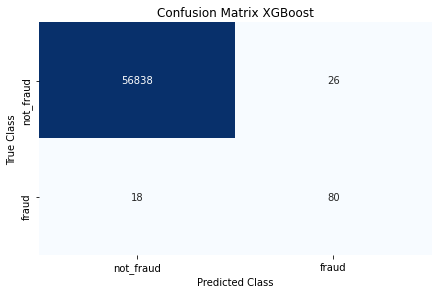

In [24]:
#scores
print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(y_test, y_pred_xgb))

#CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC XGBoost : 0.986142643959666


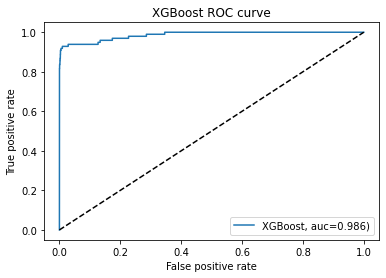

In [25]:
#AUC
y_pred_xgb_proba = model8.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

#ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

### Print the class distribution after applying ADASYN

In [126]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

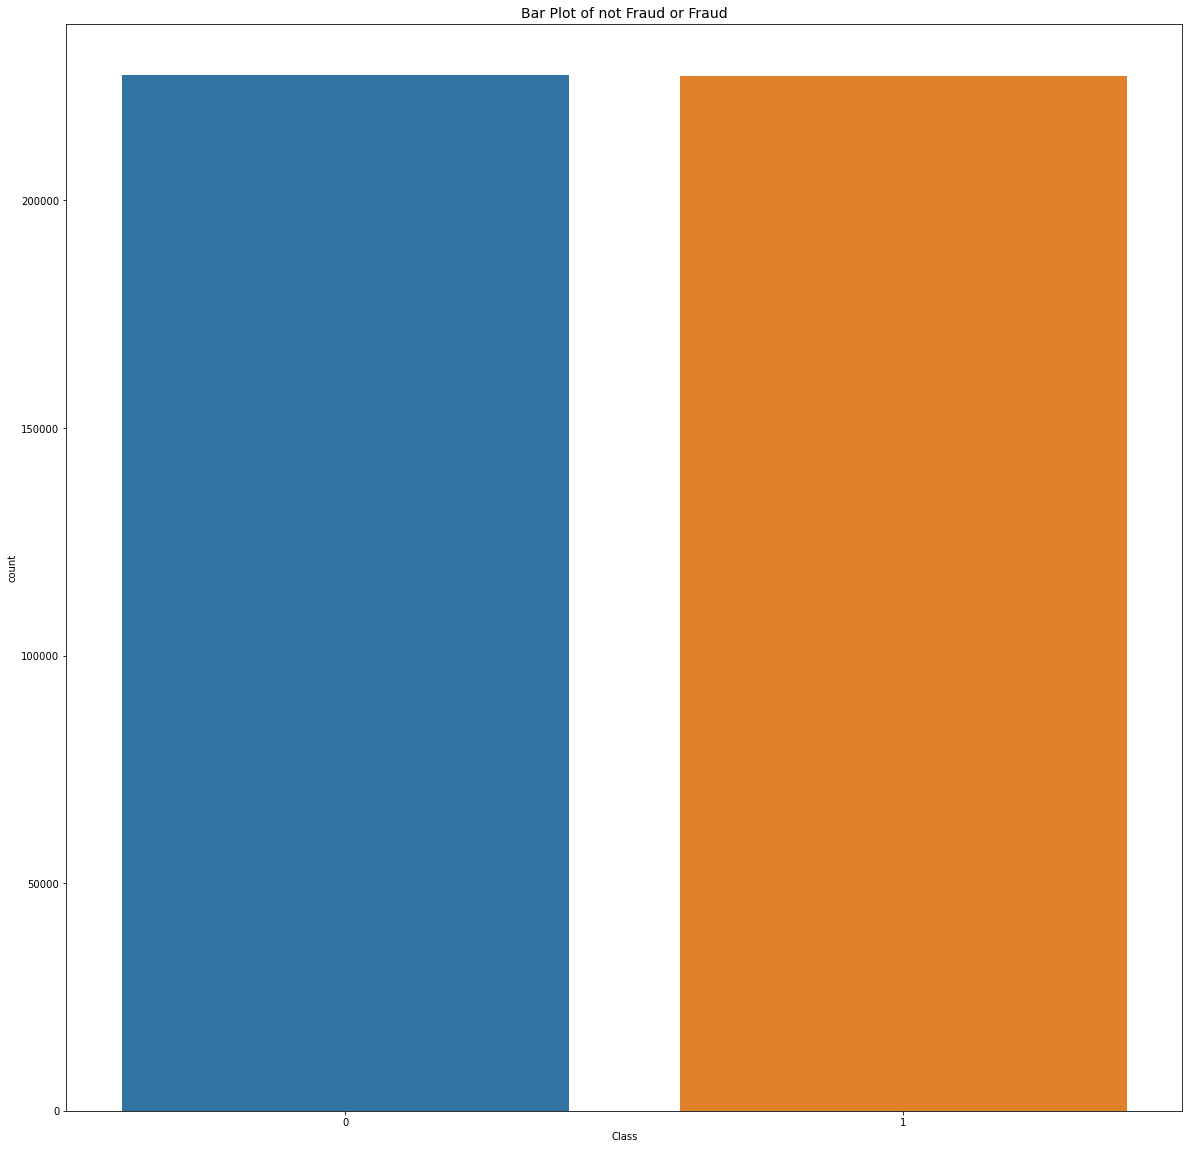

In [127]:
y_train_df_adasyn = y_train_adasyn.to_frame()
y_train_df_adasyn = y_train_df_adasyn.rename(columns = {0:'Class'})
plt.title('Bar Plot of not Fraud or Fraud',fontsize=14)
sns.countplot(x="Class", data=y_train_df_adasyn)

### Model 9: Logistics Regression on balanced dataset (ADASYN)

In [128]:
#performing cross validation
#performing hyperparameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model9 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model9, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_adasyn, y_train_adasyn)


# summarize results
#printing the optimum value of hyperparameters

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.961178 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961178 (0.000837) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.961178 (0.000837) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961178 (0.000838) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.961177 (0.000837) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.961177 (0.000837) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961177 (0.000837) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.961165 (0.000837) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.961165 (0.000837) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961162 (0.000838) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.961046 (0.000836) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.961046 (0.000836) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961045 (0.000836) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.960073 (0.000847) with: {

In [129]:
#train the model
model9=None
model9 = LogisticRegression(random_state=1, C= 100, penalty='l2', solver='lbfgs')
#model1 = LogisticRegression(random_state=1)
logit = model9.fit(X_train_adasyn, y_train_adasyn)

Accuracy Logit: 0.7362276605456269
Precision Logit: 0.0059575031442377704
Recall Logit: 0.9183673469387755
F1 Score Logit: 0.011838211114764878


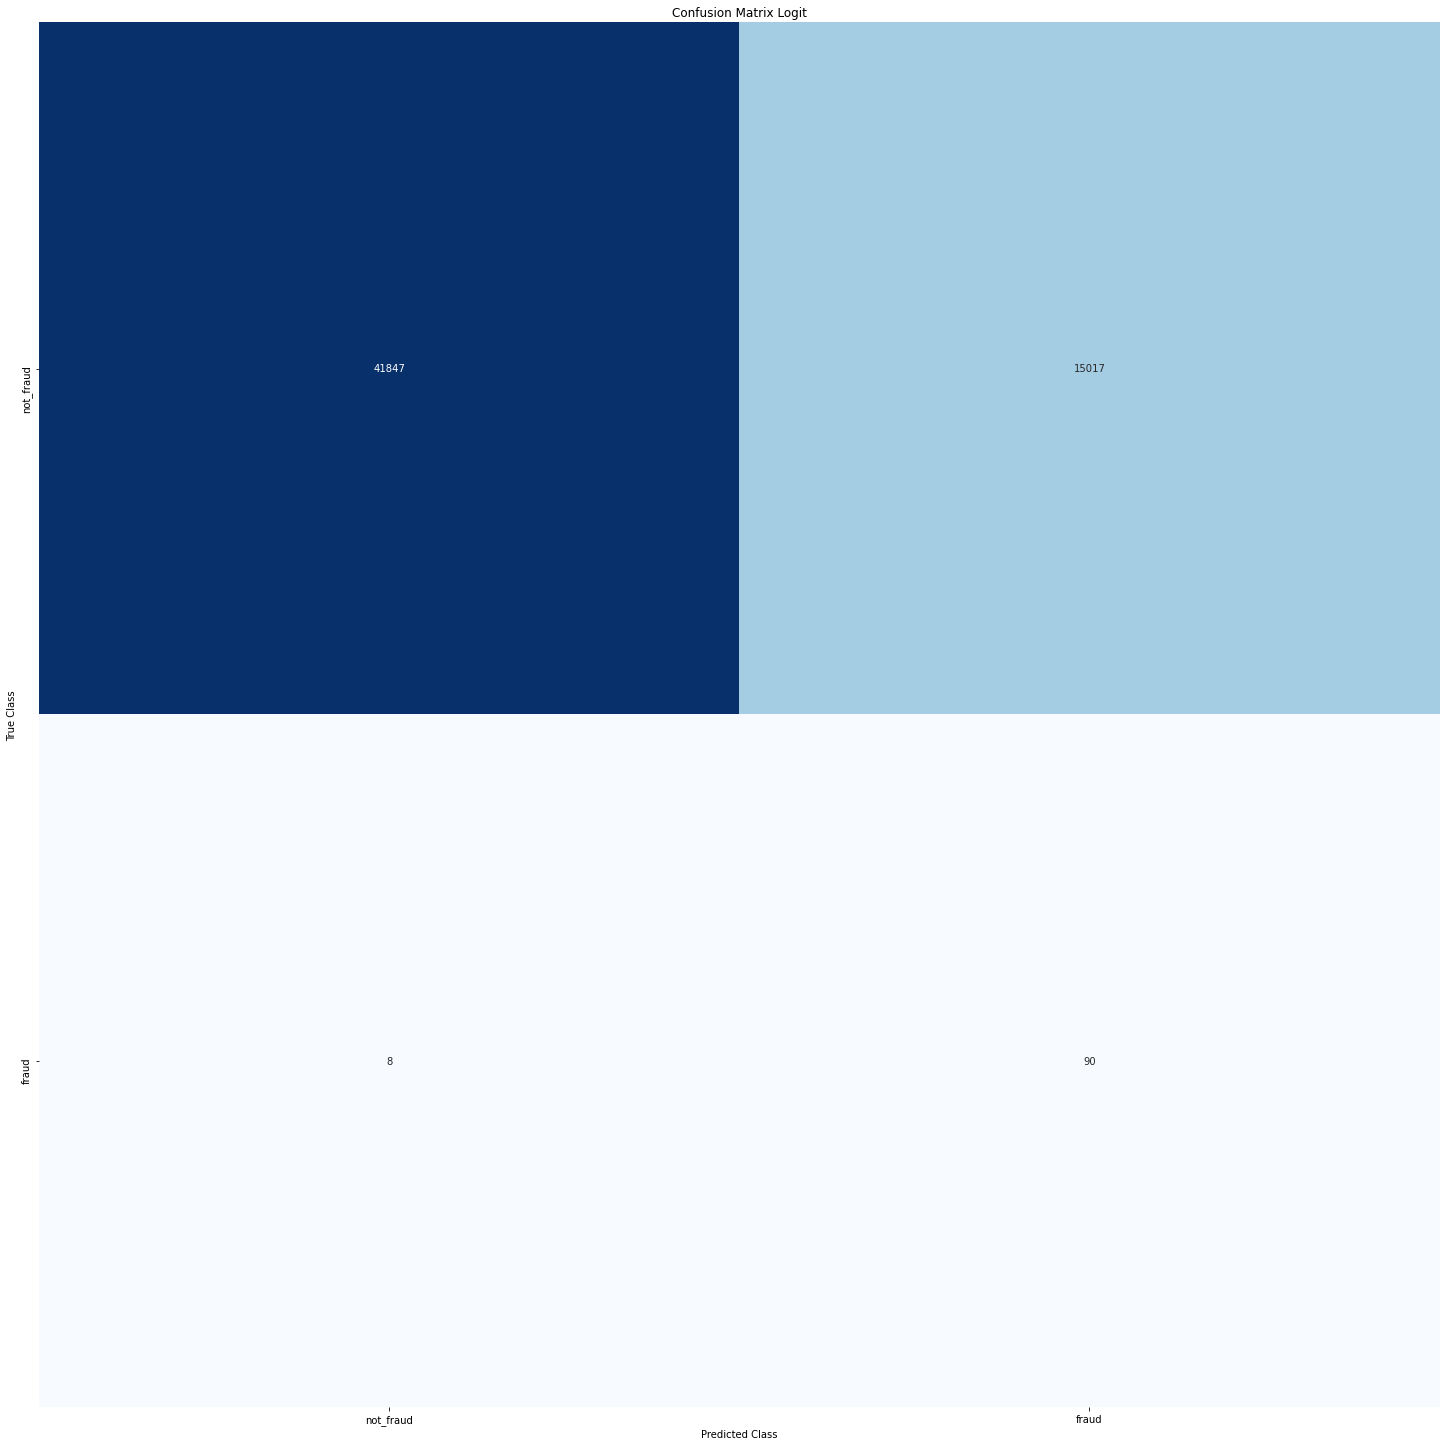

In [130]:
#predictions
y_pred_logit = model9.predict(X_test) 

#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

#printing Confusion Matrix
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC Logistic Regression : 0.9421004860863874


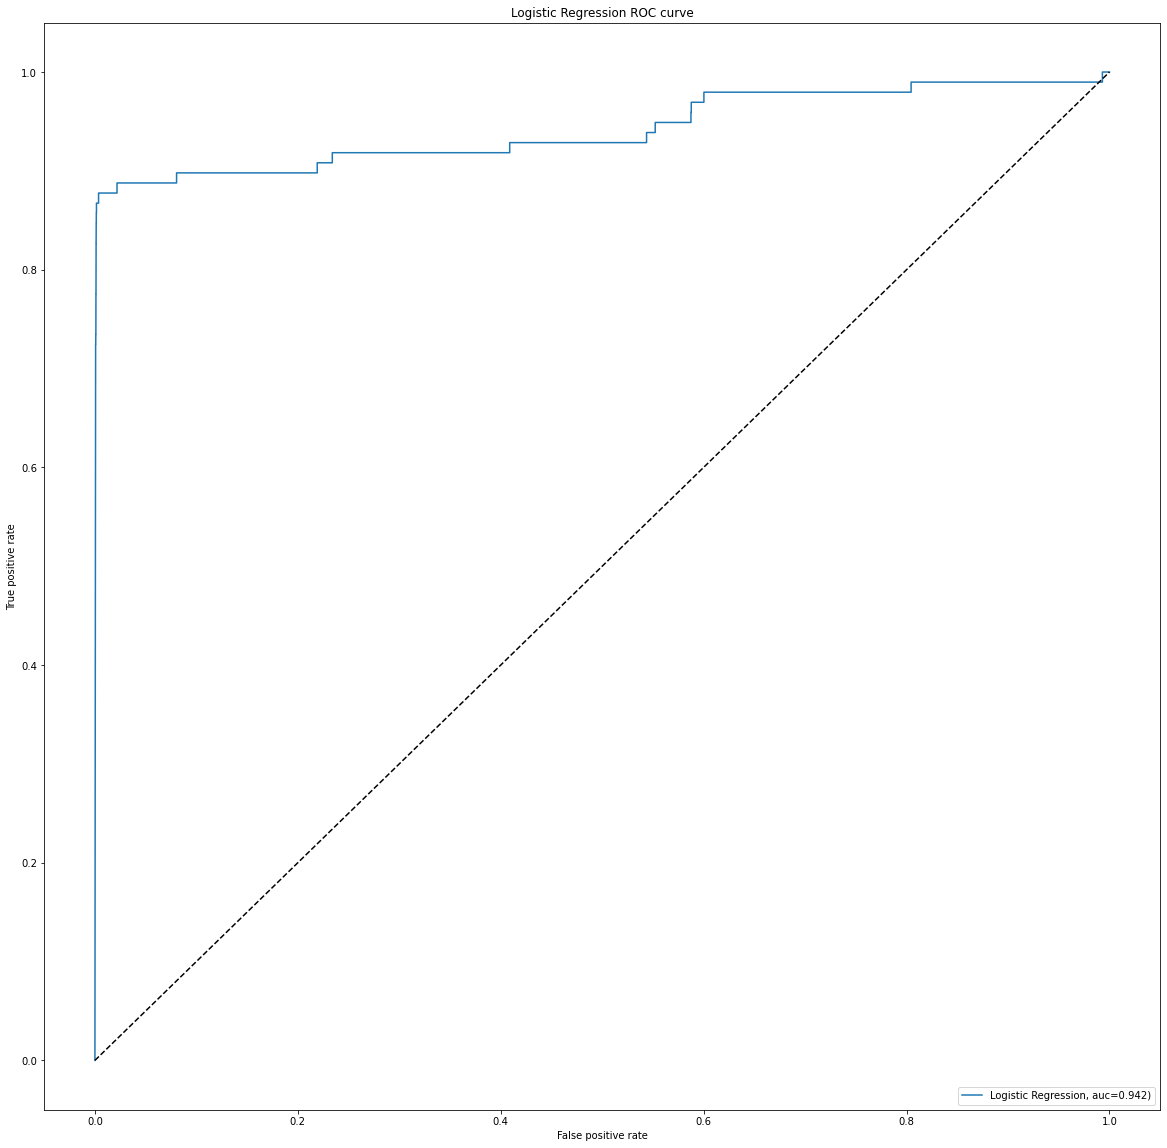

In [131]:
#AUC
y_pred_logit_proba = model9.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

### Model 10: SVM on ADASYN dataset

In [ ]:
#train the model
from sklearn.svm import SVC
#train the model with the best AUC
model10 = SVC(random_state=1, class_weight='balanced', probability=True)
svm = model10.fit(X_train_adasyn, y_train_adasyn)
#predictions
y_pred_svm = model_svm_adasyn.predict(X_test)

In [ ]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
#AUC
y_pred_svm_proba = model10.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

### Model 11: Ensemble learning : Bagging (Random Forest) on ADASYN data

In [135]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#train the model
model11 = RandomForestClassifier(random_state=2)
rf = model11.fit(X_train_adasyn, y_train_adasyn)
#predictions
y_pred_rf = model11.predict(X_test)

In [136]:
#scores
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])


Accuracy RF: 0.9995084442259752
Precision RF: 0.8888888888888888
Recall RF: 0.8163265306122449
F1 Score RF: 0.851063829787234


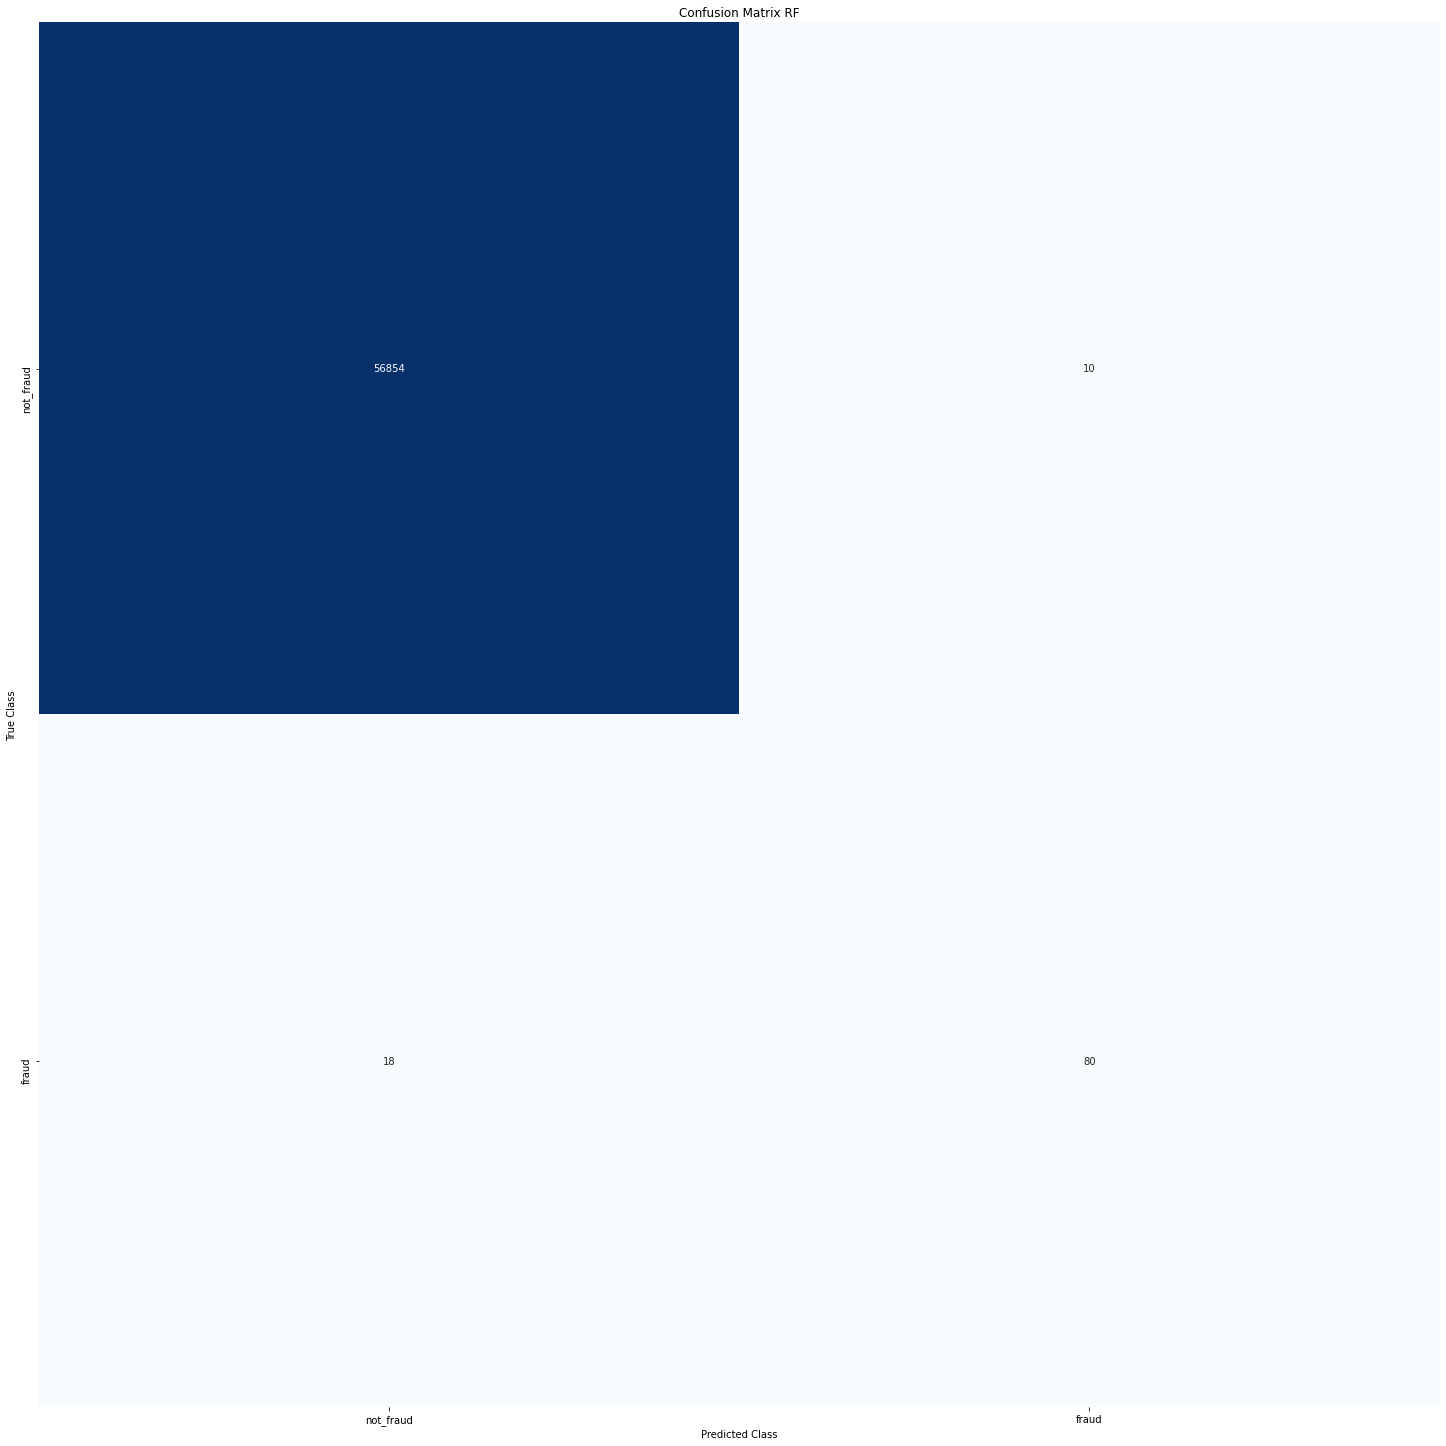

In [137]:
sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC Random Forest : 0.9667261952614472


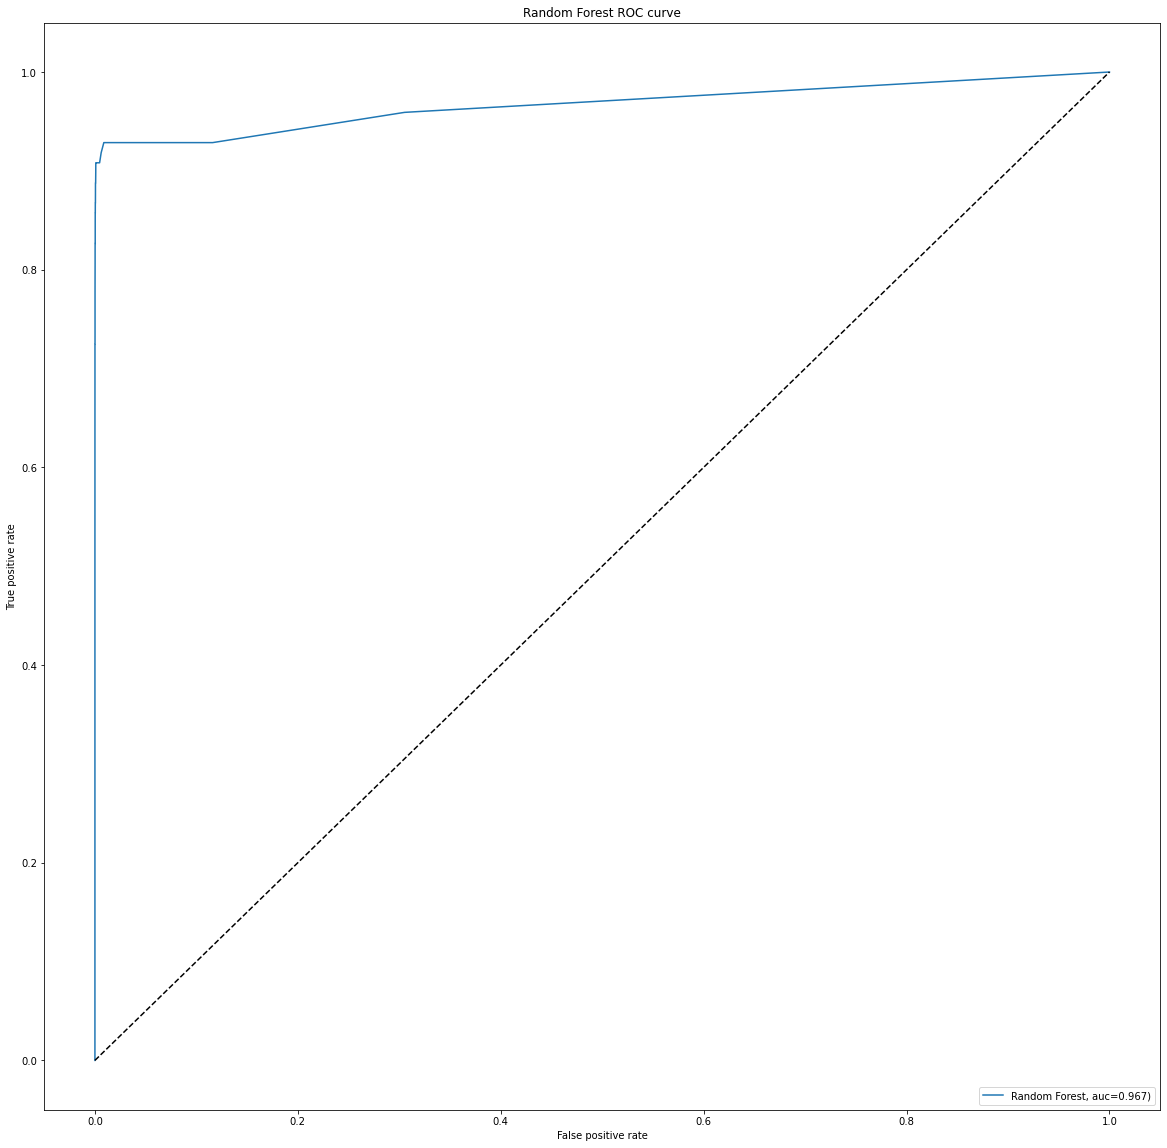

In [138]:
#AUC
y_pred_rf_proba = model11.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

### Model 12: Ensemble learning Boosting (XGBoost) on ADASYN data

In [139]:
#train the model
model12 = XGBClassifier(random_state=2)
xgb = model12.fit(X_train_adasyn, y_train_adasyn)
#predictions
y_pred_xgb = model12.predict(X_test)

[08:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy XGB: 0.9990871107053826
Precision XGB: 0.6949152542372882
Recall XGB: 0.8367346938775511
F1 Score XGB: 0.7592592592592592


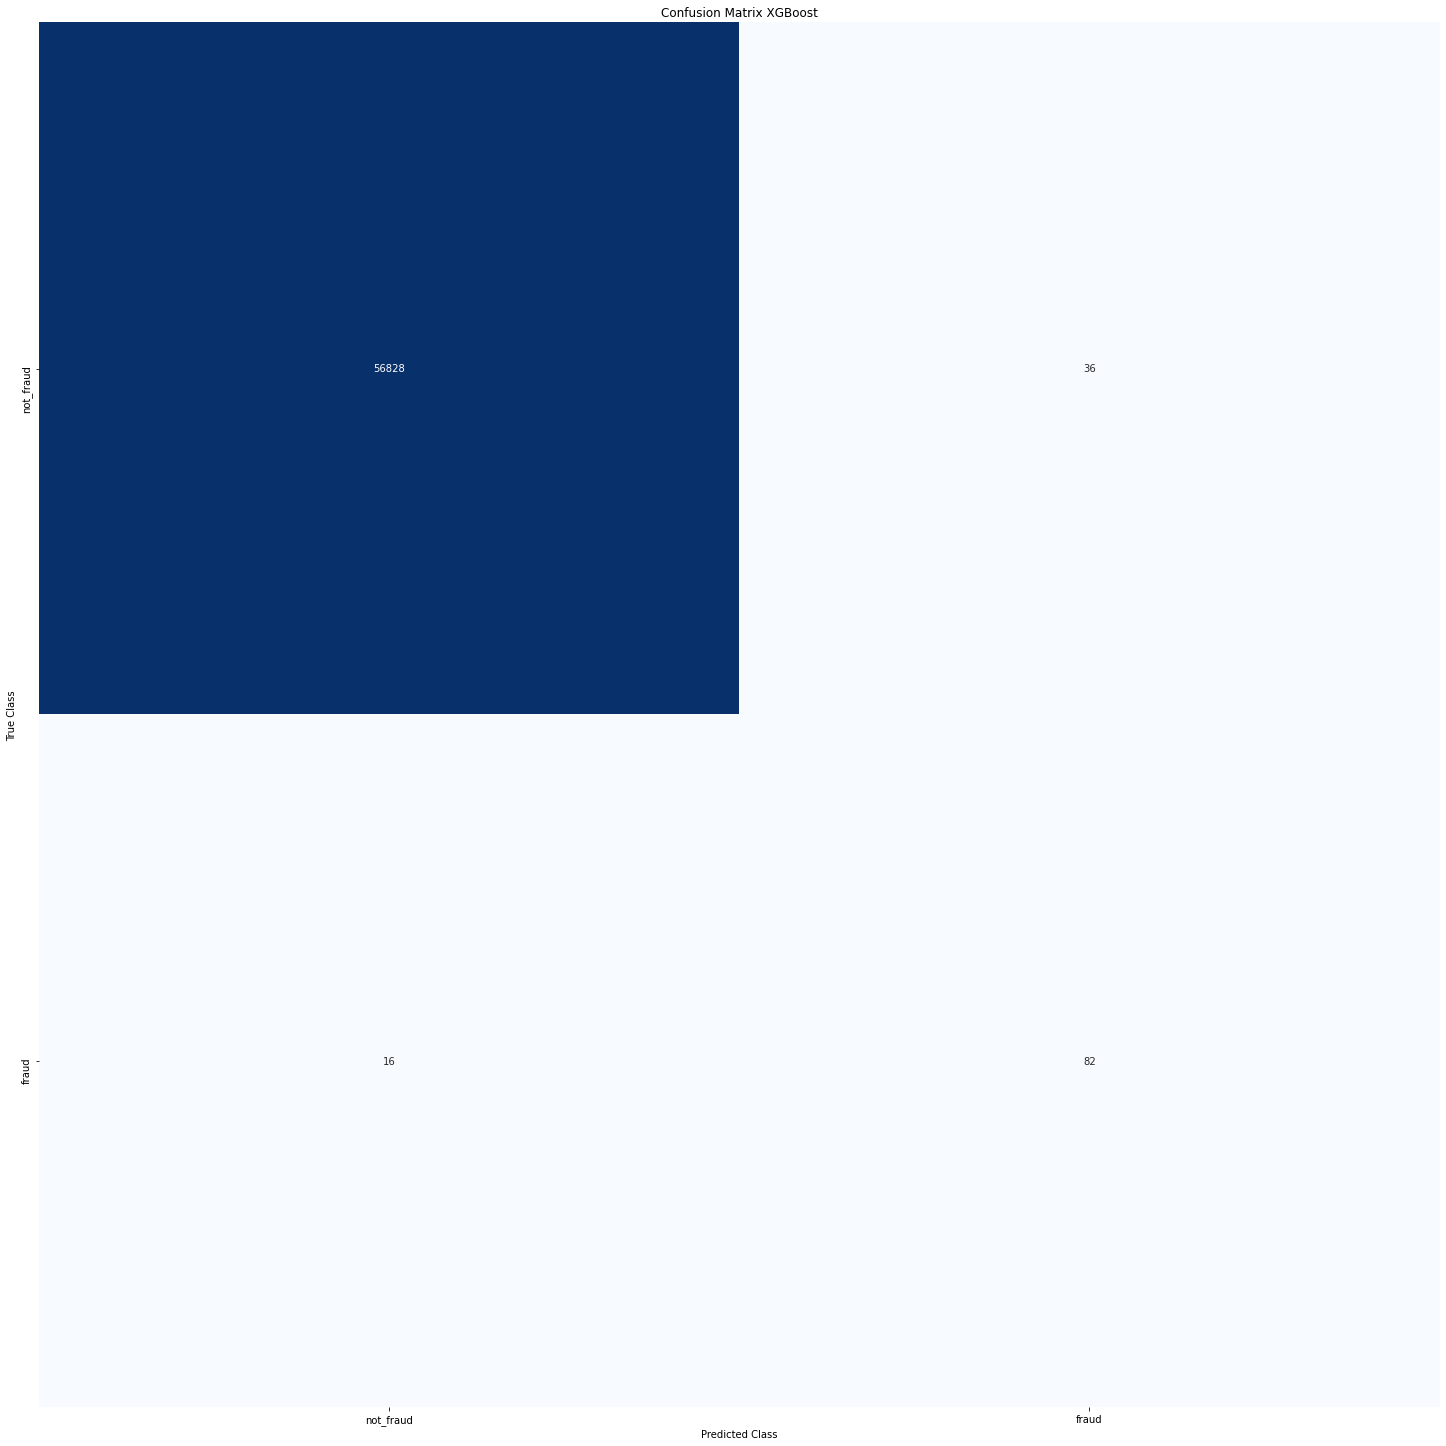

In [140]:
#scores
print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(y_test, y_pred_xgb))

#CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC XGBoost : 0.9813168620008499


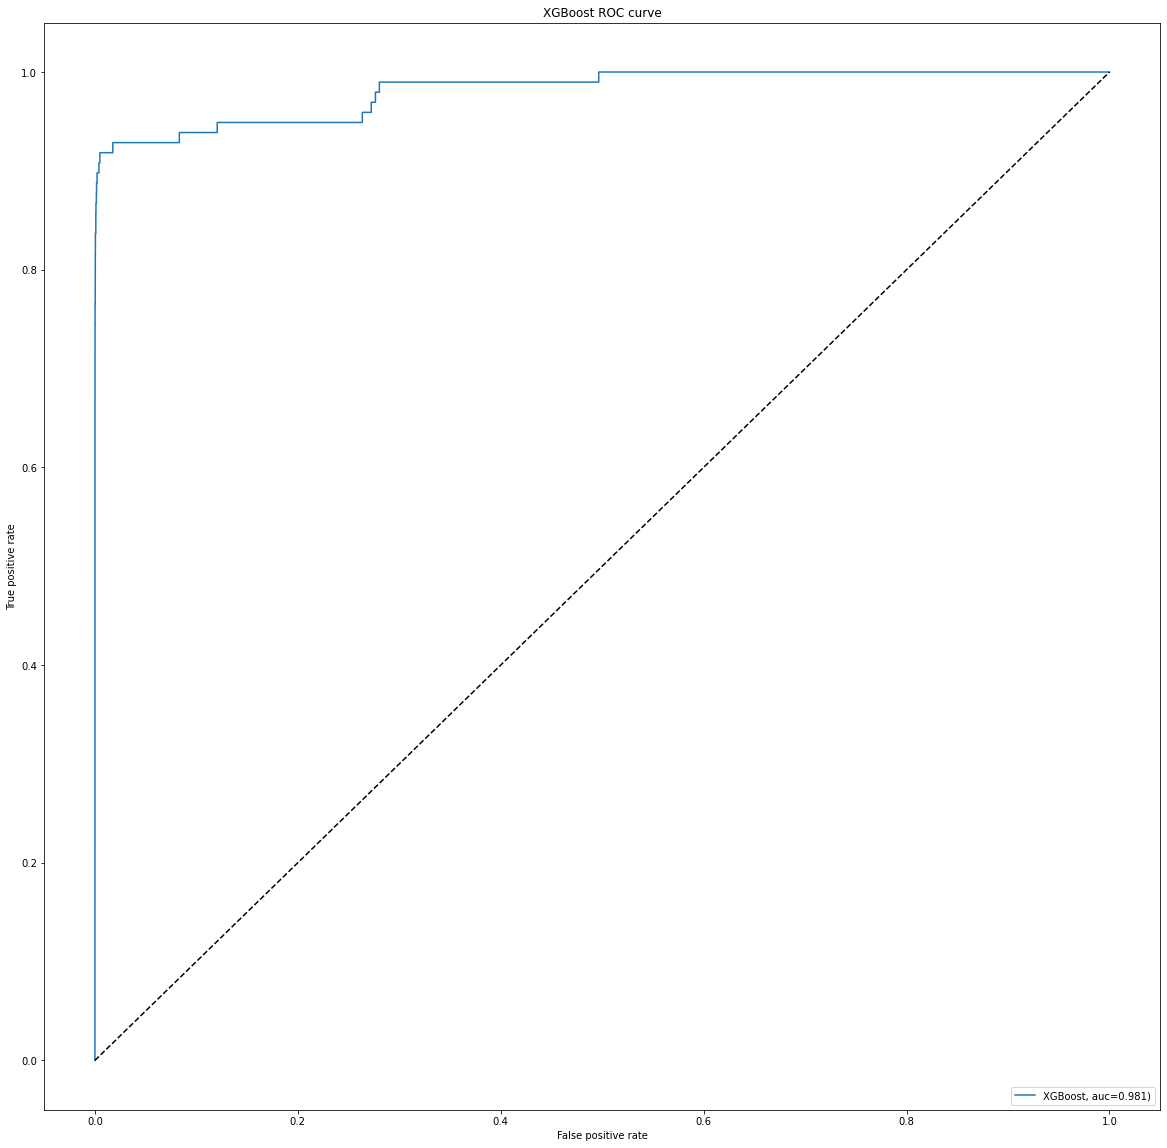

In [141]:
#AUC
y_pred_xgb_proba = model12.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)
#ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

### Print the important features of the best model to understand the dataset

#### Base on ROC_AUC score - Model8 is being chosen as the best model

Top var = 14
2nd Top var = 4
3rd Top var = 12


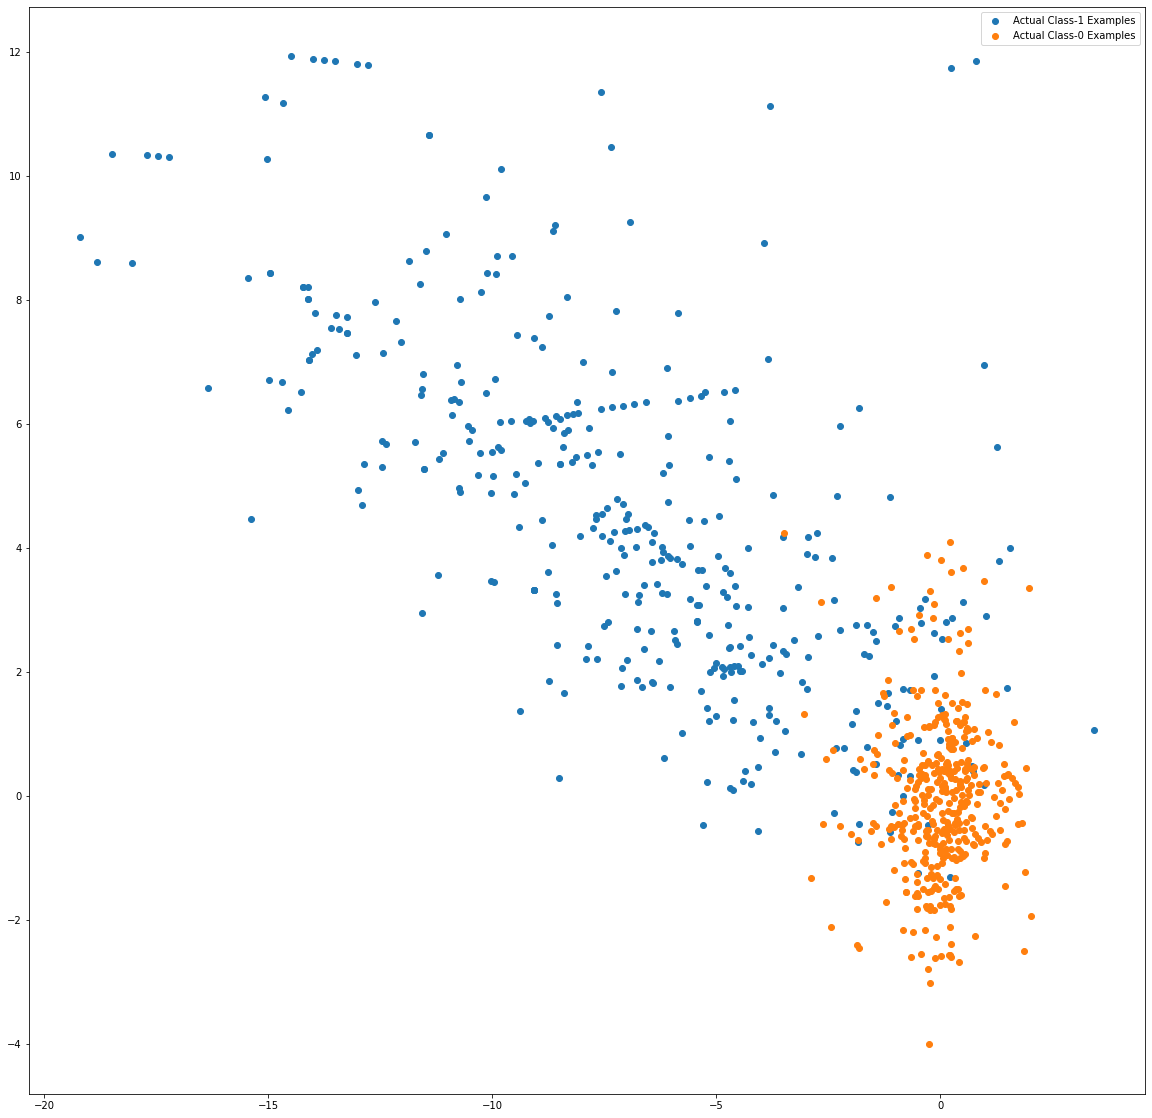

In [26]:

clf=model8
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [27]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [40]:
#AUC
y_pred_xgb_proba = model8.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, thresholds = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)
threshold = thresholds[np.argmax(tpr_xgb-fpr_xgb)]
print("Optimal Threshold: "+str(threshold))

AUC XGBoost : 0.986142643959666
Optimal Threshold: 0.008064917
